# <font color='#eb3483'> Harambee data </font>

In [135]:
#import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [136]:
df = pd.read_csv("processed_data_01012021.csv")
#display top 5 rows
df.head()

,Unnamed: 0,unid,cft_score,opt_score,com_score,grit_score,num_score,survey_date_month,survey_num,gender,...,peoplelive,peoplelive_15plus,numchildren,numearnincome,anygrant,anyhhincome,financial_situation_now,financial_situation_5years,givemoney_yes,working
0,1,41964,4.0,NaN,4.0,4.0,NaN,2018-06-01,1,Female,...,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,True
1,2,15241,4.0,7.0,5.0,3.0,NaN,2016-03-01,1,Female,...,2,NaN,3,1,True,True,2,8,False,True
2,3,33702,5.0,3.0,5.0,2.0,NaN,2016-04-01,1,Male,...,4,NaN,1,1,False,True,1 (Worst possible financial situation),1 (Worst possible financial situation),False,True
3,4,101252,10.0,4.0,NaN,0.0,NaN,2018-04-01,1,Female,...,7,5,0,NaN,True,True,1 (Worst possible financial situation),7,False,True
4,5,83023,7.0,NaN,NaN,4.0,NaN,2016-07-01,1,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [137]:
df = df.drop(columns=["Unnamed: 0"])
df.head()

,unid,cft_score,opt_score,com_score,grit_score,num_score,survey_date_month,survey_num,gender,dob,...,peoplelive,peoplelive_15plus,numchildren,numearnincome,anygrant,anyhhincome,financial_situation_now,financial_situation_5years,givemoney_yes,working
0,41964,4.0,NaN,4.0,4.0,NaN,2018-06-01,1,Female,1992-02-01,...,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,True
1,15241,4.0,7.0,5.0,3.0,NaN,2016-03-01,1,Female,1988-11-01,...,2,NaN,3,1,True,True,2,8,False,True
2,33702,5.0,3.0,5.0,2.0,NaN,2016-04-01,1,Male,1991-04-01,...,4,NaN,1,1,False,True,1 (Worst possible financial situation),1 (Worst possible financial situation),False,True
3,101252,10.0,4.0,NaN,0.0,NaN,2018-04-01,1,Female,1998-09-01,...,7,5,0,NaN,True,True,1 (Worst possible financial situation),7,False,True
4,83023,7.0,NaN,NaN,4.0,NaN,2016-07-01,1,Male,1995-08-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [138]:
df.shape

(51262, 21)

In [139]:
df.columns

Index(['unid', 'cft_score', 'opt_score', 'com_score', 'grit_score',
       'num_score', 'survey_date_month', 'survey_num', 'gender', 'dob',
       'province', 'peoplelive', 'peoplelive_15plus', 'numchildren',
       'numearnincome', 'anygrant', 'anyhhincome', 'financial_situation_now',
       'financial_situation_5years', 'givemoney_yes', 'working'],
      dtype='object')

In [140]:
#check data type
df.dtypes

unid                            int64
cft_score                     float64
opt_score                     float64
com_score                     float64
grit_score                    float64
num_score                     float64
survey_date_month              object
survey_num                      int64
gender                         object
dob                            object
province                       object
peoplelive                     object
peoplelive_15plus              object
numchildren                    object
numearnincome                  object
anygrant                       object
anyhhincome                    object
financial_situation_now        object
financial_situation_5years     object
givemoney_yes                  object
working                          bool
dtype: object

In [141]:
#check missing values
df.isnull().sum()

unid                              0
cft_score                     18382
opt_score                     28223
com_score                     31915
grit_score                    18382
num_score                     39949
survey_date_month                 0
survey_num                        0
gender                           23
dob                             161
province                      32044
peoplelive                    19393
peoplelive_15plus             39251
numchildren                   19532
numearnincome                 32468
anygrant                       5214
anyhhincome                    5214
financial_situation_now       20409
financial_situation_5years    20409
givemoney_yes                 20084
working                           0
dtype: int64

In [142]:
#percentage of missing values per column
df.isnull().sum() / df.shape[0] * 100

unid                           0.000000
cft_score                     35.858921
opt_score                     55.056377
com_score                     62.258593
grit_score                    35.858921
num_score                     77.931021
survey_date_month              0.000000
survey_num                     0.000000
gender                         0.044868
dob                            0.314073
province                      62.510242
peoplelive                    37.831142
peoplelive_15plus             76.569389
numchildren                   38.102298
numearnincome                 63.337365
anygrant                      10.171277
anyhhincome                   10.171277
financial_situation_now       39.813117
financial_situation_5years    39.813117
givemoney_yes                 39.179119
working                        0.000000
dtype: float64

In [143]:
#rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape[0])

number of duplicate rows:  0


### Univariate analysis

In [144]:
df.survey_num.value_counts()         

#discard single values

1    51262
Name: survey_num, dtype: int64

In [145]:
df.working.value_counts()

False    36766
True     14496
Name: working, dtype: int64

In [146]:
#unique values in df.peoplelive_15plus too granular
df.peoplelive_15plus.value_counts()

2               2601
1               2285
3               2277
4               1407
0               1001
More than 15     794
5                683
6                396
7                231
8                138
9                 65
10                49
12                22
11                19
15                18
14                14
13                11
Name: peoplelive_15plus, dtype: int64

<AxesSubplot:>

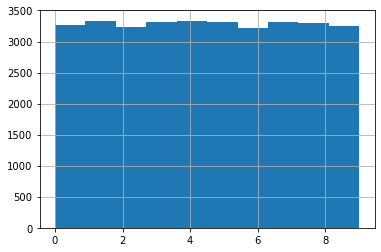

In [147]:
#histogram for grit_score
df.grit_score.hist()

<AxesSubplot:>

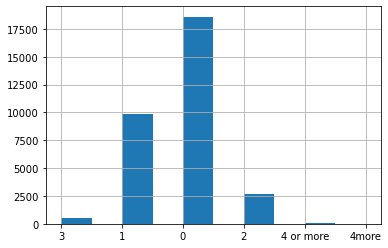

In [148]:
#histogram for num_children
df.numchildren.hist()

### Bivariate analysis

working
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: com_score, dtype: object

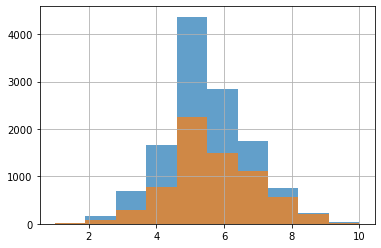

In [149]:
#histogram for numchildren depending on working value
df.groupby("working").com_score.hist(alpha = 0.7)

### Wrangling

In [150]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

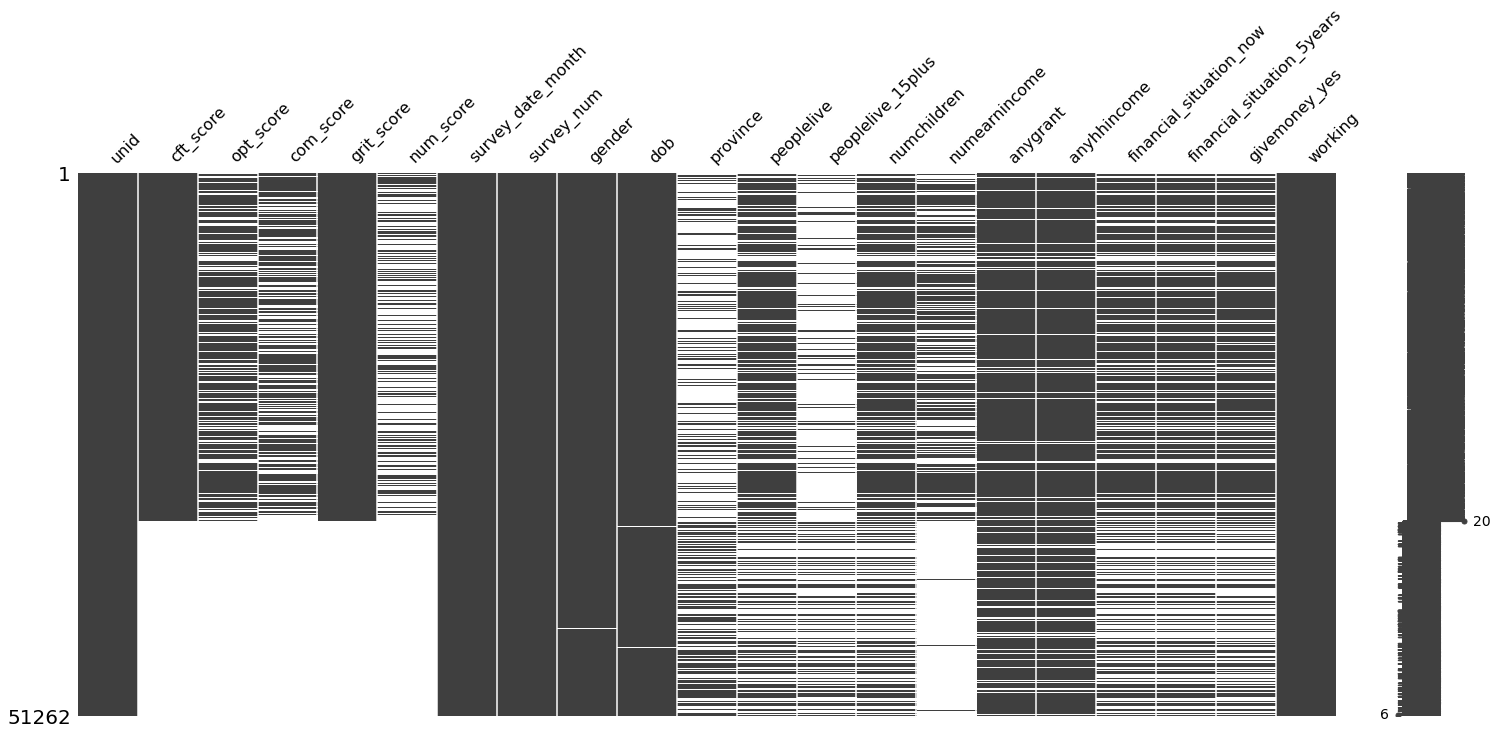

In [151]:
#visualize missing variables
import missingno as msno
msno.matrix(df)

In [152]:
df.isna().sum()

unid                              0
cft_score                     18382
opt_score                     28223
com_score                     31915
grit_score                    18382
num_score                     39949
survey_date_month                 0
survey_num                        0
gender                           23
dob                             161
province                      32044
peoplelive                    19393
peoplelive_15plus             39251
numchildren                   19532
numearnincome                 32468
anygrant                       5214
anyhhincome                    5214
financial_situation_now       20409
financial_situation_5years    20409
givemoney_yes                 20084
working                           0
dtype: int64

In [153]:
#drop unnecessary columns, those with too many missing variables
df.drop(columns=["unid", "survey_num", "num_score", "province", "peoplelive_15plus"],axis=1, inplace=True)

In [154]:
#drop rows after 32880, too many missing variables
df = df.drop(df.index[32880:])

<AxesSubplot:>

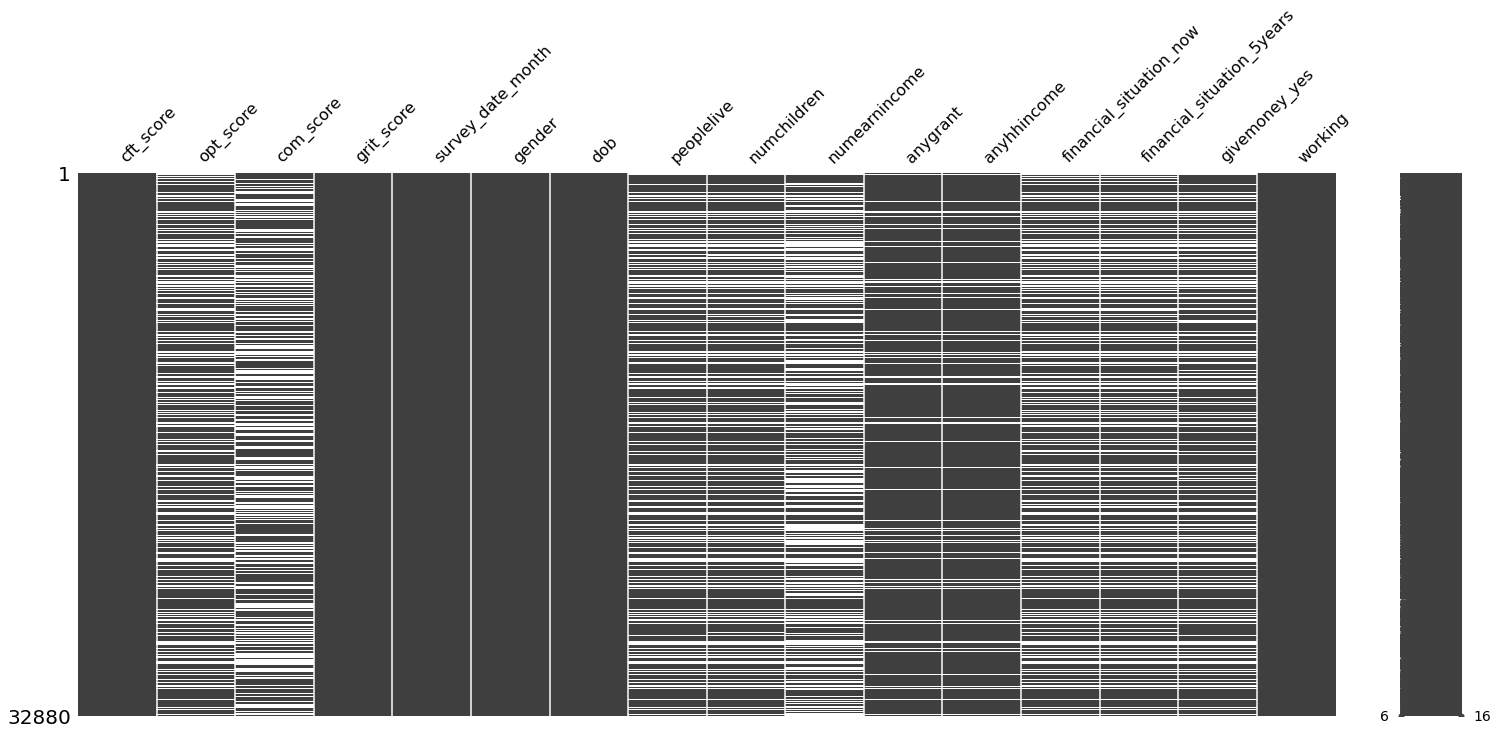

In [155]:
msno.matrix(df)

In [156]:
#display null variables in each column
df.isna().sum()

cft_score                         0
opt_score                      9841
com_score                     13533
grit_score                        0
survey_date_month                 0
gender                            0
dob                               1
peoplelive                     8913
numchildren                    9010
numearnincome                 14259
anygrant                       3012
anyhhincome                    3012
financial_situation_now        9841
financial_situation_5years     9841
givemoney_yes                  9165
working                           0
dtype: int64

In [157]:
#display null variables in dob
print(df[df['dob'].isnull()])

       cft_score  opt_score  com_score  grit_score survey_date_month gender  \
20631        6.0        5.0        NaN         8.0        2017-06-01   Male   

       dob peoplelive numchildren numearnincome anygrant anyhhincome  \
20631  NaN          6           0           NaN     True        True   

      financial_situation_now financial_situation_5years givemoney_yes  \
20631                       3                          8         False   

       working  
20631    False  


In [158]:
#drop null variables
df = df.drop(df.index[20631])

In [159]:
df.isna().sum()

cft_score                         0
opt_score                      9841
com_score                     13532
grit_score                        0
survey_date_month                 0
gender                            0
dob                               0
peoplelive                     8913
numchildren                    9010
numearnincome                 14258
anygrant                       3012
anyhhincome                    3012
financial_situation_now        9841
financial_situation_5years     9841
givemoney_yes                  9165
working                           0
dtype: int64

In [160]:
df.peoplelive.value_counts()

4                  4004
3                  3961
2                  3322
5                  3233
6                  2375
1                  2265
7                  1507
8                  1001
9                   562
0: I live alone     450
10                  407
0                   261
11                  193
12                  137
15 or more          108
13                   85
14                   61
More than 15         20
15                   12
20                    1
22                    1
Name: peoplelive, dtype: int64

In [161]:
#replace people live iwth word variables with numbers
df['peoplelive'] = df['peoplelive'].replace(['0: I live alone'],'0')

In [162]:
df['peoplelive'] = df['peoplelive'].replace(['15 or more'],'15')

In [163]:
df['peoplelive'] = df['peoplelive'].replace(['More than 15'],'16')

In [164]:
df.peoplelive.value_counts()

4     4004
3     3961
2     3322
5     3233
6     2375
1     2265
7     1507
8     1001
0      711
9      562
10     407
11     193
12     137
15     120
13      85
14      61
16      20
22       1
20       1
Name: peoplelive, dtype: int64

In [165]:
df.numearnincome.value_counts()

1                  9841
2                  3664
0                  3372
3                   889
0: I live alone     445
4                   240
5                    75
6                    34
7                    19
8                    19
10                    8
15 or more            7
9                     3
11                    3
12                    1
14                    1
Name: numearnincome, dtype: int64

In [166]:
#replace income word variables with numbers
df['numearnincome'] = df['numearnincome'].replace(['0: I live alone'],'0')

In [167]:
df['numearnincome'] = df['numearnincome'].replace(['15 or more'],'15')

In [168]:
df.numearnincome.value_counts()

1     9841
0     3817
2     3664
3      889
4      240
5       75
6       34
7       19
8       19
10       8
15       7
9        3
11       3
12       1
14       1
Name: numearnincome, dtype: int64

In [169]:
df.numchildren.value_counts()

0            13975
1             7522
2             2015
3              343
4 or more       12
4more            2
Name: numchildren, dtype: int64

In [170]:
#replace number of children word variables with numbers
df['numchildren'] = df['numchildren'].replace(['4 or more'],'4')

In [171]:
df['numchildren'] = df['numchildren'].replace(['4more'],'5')

In [172]:
df.numchildren.value_counts()

0    13975
1     7522
2     2015
3      343
4       12
5        2
Name: numchildren, dtype: int64

In [173]:
df.financial_situation_5years.value_counts()

10 (Best possible financial situation)    7691
8                                         3840
7                                         3178
9                                         2683
6                                         2356
5                                         1980
4                                          612
3                                          315
1 (Worst possible financial situation)     204
2                                          179
Name: financial_situation_5years, dtype: int64

In [174]:
#replace financial situation word variables with numbers
df['financial_situation_5years'] = df['financial_situation_5years'].replace(['10 (Best possible financial situation)'],'10')

In [175]:
df['financial_situation_5years'] = df['financial_situation_5years'].replace(['1 (Worst possible financial situation)'],'1')

In [176]:
df.financial_situation_5years.value_counts()

10    7691
8     3840
7     3178
9     2683
6     2356
5     1980
4      612
3      315
1      204
2      179
Name: financial_situation_5years, dtype: int64

In [177]:
df.financial_situation_now.value_counts()

1 (Worst possible financial situation)    8402
2                                         5080
3                                         4199
4                                         2680
5                                         1644
6                                          346
10 (Best possible financial situation)     318
7                                          205
8                                           85
9                                           79
Name: financial_situation_now, dtype: int64

In [178]:
#replace financial situation word variables with numbers
df['financial_situation_now'] = df['financial_situation_now'].replace(['10 (Best possible financial situation)'],'10')

In [179]:
df['financial_situation_now'] = df['financial_situation_now'].replace(['1 (Worst possible financial situation)'],'1')

In [180]:
df.financial_situation_now.value_counts()

1     8402
2     5080
3     4199
4     2680
5     1644
6      346
10     318
7      205
8       85
9       79
Name: financial_situation_now, dtype: int64

In [181]:
#encode date variables
df['survey_date_month'] = df['survey_date_month'].replace('-', '', regex=True).astype(int)

In [182]:
df.survey_date_month.value_counts().head()

20160301    2063
20170101    1882
20160201    1816
20170301    1752
20161001    1705
Name: survey_date_month, dtype: int64

In [183]:
#encode dob variables
df['dob'] = df['dob'].replace('-', '', regex=True).astype(int)

In [184]:
df.dob.value_counts().head()

19930901    412
19930801    404
19920301    388
19920901    383
19940401    372
Name: dob, dtype: int64

In [185]:
#encode gender variables
df['gender'] = df['gender'].replace(['Male'],'0')

In [186]:
df['gender'] = df['gender'].replace(['Female'],'1')

In [187]:
df['anygrant'] = df['anygrant'].replace([False],'0')

In [188]:
df['anygrant'] = df['anygrant'].replace([True],'1')

In [189]:
df.anygrant.head()

0      0
1      1
2      0
3      1
4    NaN
Name: anygrant, dtype: object

In [190]:
#encode boolean income variables
df['anyhhincome'] = df['anyhhincome'].replace([False],'0')

In [191]:
df['anyhhincome'] = df['anyhhincome'].replace([True],'1')

In [192]:
df['givemoney_yes'] = df['givemoney_yes'].replace([False],'0')

In [193]:
df['givemoney_yes'] = df['givemoney_yes'].replace([True],'1')

In [194]:
df.head()

,cft_score,opt_score,com_score,grit_score,survey_date_month,gender,dob,peoplelive,numchildren,numearnincome,anygrant,anyhhincome,financial_situation_now,financial_situation_5years,givemoney_yes,working
0,4.0,NaN,4.0,4.0,20180601,1,19920201,NaN,NaN,NaN,0,0,NaN,NaN,NaN,True
1,4.0,7.0,5.0,3.0,20160301,1,19881101,2,3,1,1,1,2,8,0,True
2,5.0,3.0,5.0,2.0,20160401,0,19910401,4,1,1,0,1,1,1,0,True
3,10.0,4.0,NaN,0.0,20180401,1,19980901,7,0,NaN,1,1,1,7,0,True
4,7.0,NaN,NaN,4.0,20160701,0,19950801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [195]:
#knn imputation
from sklearn.impute import KNNImputer 

In [196]:
imputer = KNNImputer()

In [197]:
#use knn imputation to fill in missing values
imputer.fit(df)

KNNImputer()

In [198]:
dftrans = imputer.transform(df)

In [199]:
df = pd.DataFrame(dftrans, columns = df.columns) 

In [200]:
#display sample of imputed values 
df.head()

,cft_score,opt_score,com_score,grit_score,survey_date_month,gender,dob,peoplelive,numchildren,numearnincome,anygrant,anyhhincome,financial_situation_now,financial_situation_5years,givemoney_yes,working
0,4.0,4.2,4.0,4.0,20180601.0,1.0,19920201.0,6.0,1.0,1.0,0.0,0.0,3.6,7.8,0.4,1.0
1,4.0,7.0,5.0,3.0,20160301.0,1.0,19881101.0,2.0,3.0,1.0,1.0,1.0,2.0,8.0,0.0,1.0
2,5.0,3.0,5.0,2.0,20160401.0,0.0,19910401.0,4.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
3,10.0,4.0,6.4,0.0,20180401.0,1.0,19980901.0,7.0,0.0,2.0,1.0,1.0,1.0,7.0,0.0,1.0
4,7.0,2.4,5.4,4.0,20160701.0,0.0,19950801.0,3.2,0.4,2.0,0.4,1.0,3.8,7.8,0.2,0.0


<AxesSubplot:>

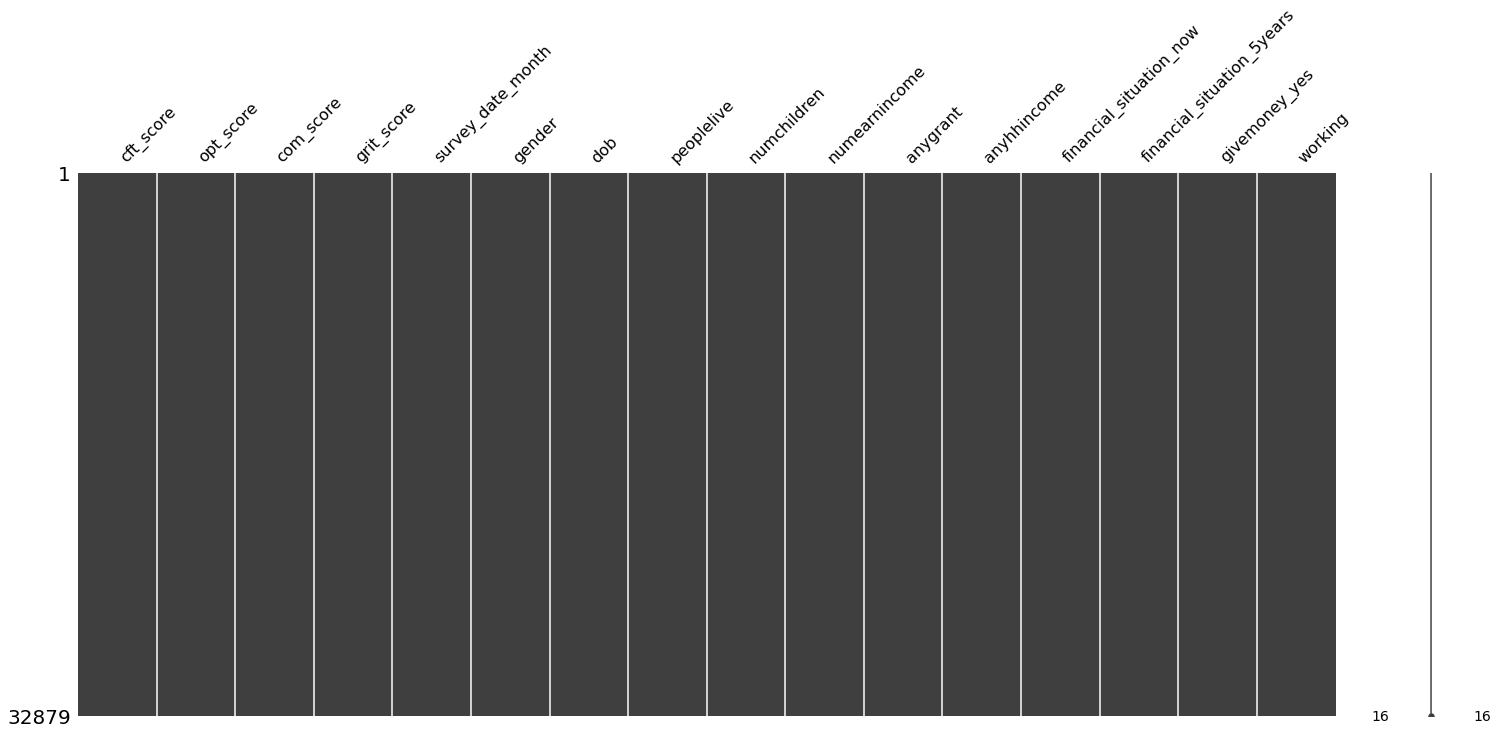

In [201]:
#display wrangled data
msno.matrix(df)